In [1]:
import pandas as pd
import pylab as pl
import seaborn as sn
import numpy as np
import zipfile
import geopandas as gp
import statsmodels as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%html
<style>
div.input {
    display:none;
}
</style>

In [3]:
upz = gp.GeoDataFrame.from_file("upz.shp")

upz.loc[55, 'NUMERO'] = '801'
upz.loc[54, 'NUMERO'] = '801'

upz.loc[9, 'NUMERO'] = '802'
upz.loc[13, 'NUMERO'] = '802'

upz.loc[105, 'NUMERO'] = '803'
upz.loc[107, 'NUMERO'] = '803'

upz.loc[100, 'NUMERO'] = '804'
upz.loc[99, 'NUMERO'] = '804'
upz.loc[101, 'NUMERO'] = '804'

upz.loc[88, 'NUMERO'] = '805'
upz.loc[89, 'NUMERO'] = '805'

upz.loc[79, 'NUMERO'] = '806'
upz.loc[78, 'NUMERO'] = '806'
upz.loc[80, 'NUMERO'] = '806'

upz.loc[103, 'NUMERO'] = '807'
upz.loc[75, 'NUMERO'] = '807'

upz.loc[68, 'NUMERO'] = '808'
upz.loc[69, 'NUMERO'] = '808'

upz.loc[61, 'NUMERO'] = '809'
upz.loc[59, 'NUMERO'] = '809'

upz.loc[97, 'NUMERO'] = '810'
upz.loc[95, 'NUMERO'] = '810'
upz.loc[98, 'NUMERO'] = '810'

upz.loc[30, 'NUMERO'] = '811'
upz.loc[31, 'NUMERO'] = '811'

upz.loc[111, 'NUMERO'] = '812'
upz.loc[27, 'NUMERO'] = '812'

upz.loc[0, 'NUMERO'] = '813'
upz.loc[3, 'NUMERO'] = '813'

upz.loc[39, 'NUMERO'] = '814'
upz.loc[37, 'NUMERO'] = '814'

upz.loc[108, 'NUMERO'] = '815'
upz.loc[109, 'NUMERO'] = '815'
upz.loc[52, 'NUMERO'] = '815'

upz.loc[46, 'NUMERO'] = '816'
upz.loc[45, 'NUMERO'] = '816'

upz.loc[42, 'NUMERO'] = '817'
upz.loc[43, 'NUMERO'] = '817'

In [4]:
df = pd.read_csv("multiproposito_hasta_cap_c.csv")

In [5]:
datos = df.groupby(df["NUMERO"]).mean().reset_index()

In [6]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [7]:
upz.NUMERO = upz.NUMERO.astype(str)

In [8]:
datos.NUMERO = datos.NUMERO.astype(str)

In [9]:
nombre_numero = upz[["NUMERO", "NOMBRE"]]

nombre_numero

,NUMERO,NOMBRE
0,813,AEROPUERTO EL DORADO
1,76,FONTIBON SAN PABLO
2,77,ZONA FRANCA
3,813,CAPELLANIA
4,75,FONTIBON
5,114,MODELIA
6,112,GRANJAS DE TECHO
7,110,CIUDAD SALITRE OCCIDENTAL
8,78,TINTAL NORTE
9,802,CASTILLA


In [10]:
# Encuentre acá la tabla para identificar el numero de la UPZ basado en el nombre

# El numero de la UPZ puede haber sido modificado del original debido a uniones hechas por el DANE para asegurar significancia estadistica

nombre_upz = input("inserte aca nombre UPZ en mayusculas y sin tildes para saber el numero. Si no conoce el Nombre Preciso revise la tabla de arriba")

nombre_correcto = nombre_numero[nombre_numero.NOMBRE == nombre_upz]

nombre_correcto

inserte aca nombre UPZ en mayusculas y sin tildes para saber el numero. Si no conoce el Nombre Preciso revise la tabla de arribaCHAPINERO


,NUMERO,NOMBRE
45,816,CHAPINERO


Inserte el numero de UPZ que le interesa816

Este es el numero de la UPZ que la interesa :  816
Esta es la ubicacion en el mapa de bogota :


(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

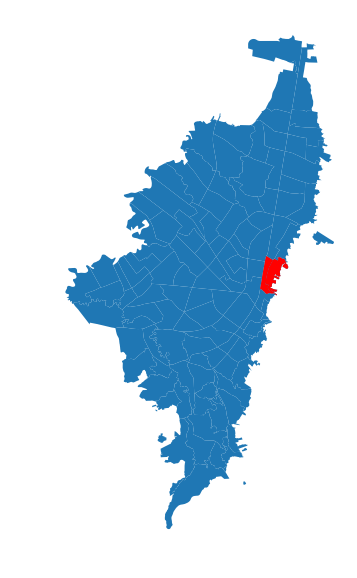

In [11]:
UPZ_interes = input("Inserte el numero de UPZ que le interesa")

print ("")

print ("Este es el numero de la UPZ que la interesa",":", "", UPZ_interes)

type(UPZ_interes)


upz_deseada = datos[datos["NUMERO"]== UPZ_interes]

datos = pd.merge(datos, upz,on="NUMERO")

mean_deseada = pd.merge(upz_deseada, upz,on="NUMERO")

datos = gp.GeoDataFrame(datos)
mean_deseada = gp.GeoDataFrame(mean_deseada)

print ("Esta es la ubicacion en el mapa de bogota :")

base = upz.plot(figsize=(10,10))

mean_deseada.plot(ax = base, legend=True, color = "r", lw = 0.5, label = "UPZ 52 -La Flora")


plt.axis("off")



In [12]:
print ("Conozca como se compara su UPZ en accesibilidad a diferentes servicios en comparacion con la ciudad")

print ("")

print ("tiempo caminando a Transmilenio o Alimentator de la UPZ seleccionada", "=", 
       "%.2f" %mean_deseada.tiempo_caminando_transmilenio_alimentador.mean(), "minutos")

print ("tiempo promedio de todas las UPZ de la ciudad =", 
       "%.2f" %datos.tiempo_caminando_transmilenio_alimentador.mean(), "minutos")

print ("percentil en el que se encuentra la UPZ =", 
      scipy.stats.percentileofscore(datos.tiempo_caminando_transmilenio_alimentador,mean_deseada.tiempo_caminando_transmilenio_alimentador.mean()))

print ("")

print ("tiempo caminando a SITP de la UPZ seleccionada", "=", 
       "%.2f" %mean_deseada.tiempo_caminando_SITP.mean(), "minutos")

print ("tiempo promedio de todas las UPZ de la ciudad =", 
       "%.2f" %datos.tiempo_caminando_SITP.mean(), "minutos")

print ("percentil en el que se encuentra la UPZ =", 
      scipy.stats.percentileofscore(datos.tiempo_caminando_SITP,mean_deseada.tiempo_caminando_SITP.mean()))


print ("")

print ("tiempo caminando a Parque de la UPZ seleccionada", "=", 
       "%.2f" %mean_deseada.tiempo_caminando_parque.mean(), "minutos")

print ("tiempo promedio de todas las UPZ de la ciudad =", 
       "%.2f" %datos.tiempo_caminando_parque.mean(), "minutos")

print ("percentil en el que se encuentra la UPZ =", 
      scipy.stats.percentileofscore(datos.tiempo_caminando_parque,mean_deseada.tiempo_caminando_parque.mean()))


print ("")

print ("tiempo caminando a banco de la UPZ seleccionada", "=", 
      "%.2f" %mean_deseada.tiempo_caminando_banco.mean(), "minutos")

print ("tiempo promedio de todas las UPZ de la ciudad =", 
       "%.2f" %datos.tiempo_caminando_banco.mean(), "minutos")

print ("percentil en el que se encuentra la UPZ =", 
      scipy.stats.percentileofscore(datos.tiempo_caminando_banco,mean_deseada.tiempo_caminando_banco.mean()))


print ("")

print ("tiempo caminando a CAI o estacion de policía de la UPZ seleccionada", "=", 
       "%.2f" %mean_deseada.tiempo_caminando_CAI_estacion_policia.mean(), "minutos")

print ("tiempo promedio de todas las UPZ de la ciudad =", 
       "%.2f" %datos.tiempo_caminando_CAI_estacion_policia.mean(), "minutos")

print ("percentil en el que se encuentra la UPZ =", 
      scipy.stats.percentileofscore(datos.tiempo_caminando_CAI_estacion_policia,mean_deseada.tiempo_caminando_CAI_estacion_policia.mean()))


print ("")

print ("tiempo caminando a Cicloruta de la UPZ seleccionada", "=", 
       "%.2f" %mean_deseada.tiempo_caminando_cicloruta.mean(), "minutos")

print ("tiempo promedio de todas las UPZ de la ciudad =", 
       "%.2f" %datos.tiempo_caminando_cicloruta.mean(), "minutos")

print ("percentil en el que se encuentra la UPZ =", 
      scipy.stats.percentileofscore(datos.tiempo_caminando_cicloruta,mean_deseada.tiempo_caminando_cicloruta.mean()))

print ("")

print ("tiempo caminando a Centro Medico de la UPZ seleccionada", "=", 
       "%.2f" %mean_deseada.tiempo_caminando_medico.mean(), "minutos")

print ("tiempo promedio de todas las UPZ de la ciudad =", 
       "%.2f" %datos.tiempo_caminando_medico.mean(), "minutos")

print ("percentil en el que se encuentra la UPZ =", 
      scipy.stats.percentileofscore(datos.tiempo_caminando_medico,mean_deseada.tiempo_caminando_medico.mean()))


Conozca como se compara su UPZ en accesibilidad a diferentes servicios en comparacion con la ciudad

tiempo caminando a Transmilenio o Alimentator de la UPZ seleccionada = 10.15 minutos
tiempo promedio de todas las UPZ de la ciudad = 13.01 minutos
percentil en el que se encuentra la UPZ = 31.363636363636363

tiempo caminando a SITP de la UPZ seleccionada = 7.19 minutos
tiempo promedio de todas las UPZ de la ciudad = 8.30 minutos
percentil en el que se encuentra la UPZ = 21.363636363636363

tiempo caminando a Parque de la UPZ seleccionada = 10.77 minutos
tiempo promedio de todas las UPZ de la ciudad = 10.22 minutos
percentil en el que se encuentra la UPZ = 66.81818181818181

tiempo caminando a banco de la UPZ seleccionada = 8.74 minutos
tiempo promedio de todas las UPZ de la ciudad = 17.76 minutos
percentil en el que se encuentra la UPZ = 9.545454545454545

tiempo caminando a CAI o estacion de policía de la UPZ seleccionada = 11.20 minutos
tiempo promedio de todas las UPZ de la ciudad =

In [13]:
print ("Conozca como se compara en terminos del porcentaje de viviendas que consideran alguno de estos problemas como algo que los afecta")

print ("")

print ("porcentaje de viviendas en la UPZ que consideran la inseguridad un problema","%.2f" %(mean_deseada.problema_inseguridad.mean()* 100), "%")
print ("promedio de todas las UPZ en la ciudad", "%.2f" %(datos.problema_inseguridad.mean() * 100), "%")
print ("percentil en el que se encuentra la UPZ =", 
      scipy.stats.percentileofscore(datos.problema_inseguridad,mean_deseada.problema_inseguridad.mean()))


print ("")

print ("porcentaje de viviendas en la UPZ que consideran la calidad del aire un problema", "%.2f" %(mean_deseada.problema_aire.mean()* 100), "%")
print ("promedio de todas las UPZ en la ciudad", "%.2f" %(datos.problema_aire.mean()* 100), "%")
print ("percentil en el que se encuentra la UPZ =", 
      scipy.stats.percentileofscore(datos.problema_aire,mean_deseada.problema_aire.mean()))

print ("")

print ("porcentaje de viviendas en la UPZ que consideran la falta de espacio publico un problema", "%.2f" %(mean_deseada.problema_espacio_publico.mean()* 100), "%")
print ("promedio de todas las UPZ en la ciudad", "%.2f" %(datos.problema_espacio_publico.mean()* 100), "%")
print ("percentil en el que se encuentra la UPZ =", 
      scipy.stats.percentileofscore(datos.problema_espacio_publico,mean_deseada.problema_espacio_publico.mean()))



Conozca como se compara en terminos del porcentaje de viviendas que consideran alguno de estos problemas como algo que los afecta

porcentaje de viviendas en la UPZ que consideran la inseguridad un problema 41.88 %
promedio de todas las UPZ en la ciudad 61.12 %
percentil en el que se encuentra la UPZ = 23.181818181818183

porcentaje de viviendas en la UPZ que consideran la calidad del aire un problema 38.09 %
promedio de todas las UPZ en la ciudad 34.05 %
percentil en el que se encuentra la UPZ = 63.18181818181818

porcentaje de viviendas en la UPZ que consideran la falta de espacio publico un problema 17.15 %
promedio de todas las UPZ en la ciudad 15.25 %
percentil en el que se encuentra la UPZ = 66.81818181818181


In [14]:
print ("Ahora miremos porcentaje de viviendas con Moto, Bici y Carro")

print ("")

print ("porcentaje de viviendas con carro en la UPZ", "%.2f" %(mean_deseada.poseen_carro.mean()* 100), "%")
print ("promedio de todas las UPZ en la ciudad", "%.2f" %(datos.poseen_carro.mean()* 100), "%")
print ("percentil en el que se encuentra la UPZ =", 
      scipy.stats.percentileofscore(datos.poseen_carro,mean_deseada.poseen_carro.mean()))

print ("")

print ("porcentaje de viviendas en la UPZ que poseen moto", "%.2f" %(mean_deseada.poseen_moto.mean()* 100), "%")
print ("promedio de todas las UPZ en la ciudad", "%.2f" %(datos.poseen_moto.mean()* 100), "%")
print ("percentil en el que se encuentra la UPZ =", 
      scipy.stats.percentileofscore(datos.poseen_moto,mean_deseada.poseen_moto.mean()))

print ("")

print ("porcentaje de viviendas en la UPZ que poseen bicicleta", "%.2f" %(mean_deseada.poseen_bici.mean()* 100), "%")
print ("promedio de todas las UPZ en la ciudad", "%.2f" %(datos.poseen_bici.mean()* 100), "%")
print ("percentil en el que se encuentra la UPZ =", 
      scipy.stats.percentileofscore(datos.poseen_bici,mean_deseada.poseen_bici.mean()))

Ahora miremos porcentaje de viviendas con Moto, Bici y Carro

porcentaje de viviendas con carro en la UPZ 45.49 %
promedio de todas las UPZ en la ciudad 30.25 %
percentil en el que se encuentra la UPZ = 75.0

porcentaje de viviendas en la UPZ que poseen moto 4.51 %
promedio de todas las UPZ en la ciudad 8.76 %
percentil en el que se encuentra la UPZ = 16.818181818181817

porcentaje de viviendas en la UPZ que poseen bicicleta 38.45 %
promedio de todas las UPZ en la ciudad 30.91 %
percentil en el que se encuentra la UPZ = 66.81818181818181


In [15]:
print ("Finalmente miremos el numero promedio de personas en el hogar y promedio de numero de pisos")

print ("")

print ("promedio numero de personas en el hogar en la UPZ", "%.2f" %mean_deseada.personas_en_hogar.mean(), "personas por hogar")
print ("promedio de todas las UPZ", "%.2f" %datos.personas_en_hogar.mean(), "personas por hogar")
print ("percentil en el que se encuentra la UPZ =", 
      scipy.stats.percentileofscore(datos.personas_en_hogar,mean_deseada.personas_en_hogar.mean()))

print ("")

print ("promedio numero de pisos de las viviendas en la UPZ", "%.2f" %mean_deseada.numero_pisos.mean(), "pisos")
print ("promedio de todas las UPZ", "%.2f" %datos.numero_pisos.mean(), "pisos")
print ("percentil en el que se encuentra la UPZ =", 
      scipy.stats.percentileofscore(datos.numero_pisos,mean_deseada.numero_pisos.mean()))

Finalmente miremos el numero promedio de personas en el hogar y promedio de numero de pisos

promedio numero de personas en el hogar en la UPZ 1.84 personas por hogar
promedio de todas las UPZ 2.84 personas por hogar
percentil en el que se encuentra la UPZ = 3.1818181818181817

promedio numero de pisos de las viviendas en la UPZ 7.14 pisos
promedio de todas las UPZ 4.24 pisos
percentil en el que se encuentra la UPZ = 92.27272727272727
